<a href="https://colab.research.google.com/github/YMGYM/TSE_Learning/blob/master/garbage_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Info

This is my parctice file which train a Deep-learning model

I used CNN layers, and dataset is from [here](https://www.kaggle.com/asdasdasasdas/garbage-classification)

# Import dataset and preprocessing

## unzip and load

In [10]:
!unzip -q /content/drive/My\ Drive/Datasets/garbage.zip  -d ./dataset

In [11]:
import pathlib

data_dir = pathlib.Path('/content/dataset/garbage classification/Garbage classification')
num_of_images = len(list(data_dir.glob('*/*.jpg')))

print(num_of_images)

2527


## Get classes name

In [12]:
import numpy as np

CLASSES = [item.name for item in data_dir.glob('*')]
np_classes = np.array(CLASSES)
CLASSES

['glass', 'paper', 'metal', 'cardboard', 'plastic', 'trash']

## Import Keras and DataGenerator

In [13]:
import tensorflow.keras as K

In [14]:
image_generator = K.preprocessing.image.ImageDataGenerator(rotation_range=180, horizontal_flip=True, vertical_flip=True, validation_split=0.2, rescale= 1.0/255.0 )

In [15]:
BATCH_SIZE = 128
IMAGE_HEIGHT = 250
IMAGE_WIDTH = 250

In [16]:
generated_train_data = image_generator.flow_from_directory(directory=data_dir, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH), class_mode='categorical', classes=CLASSES, batch_size=BATCH_SIZE, shuffle=True)

Found 2527 images belonging to 6 classes.


## Show Image

In [17]:
import matplotlib.pyplot as plt

def show_image(image_batch, label_batch):
  plt.figure(figsize = (10,10))
  for n in range(25):
    ax = plt.subplot(5, 5, n+1)
    plt.imshow(image_batch[n])
    plt.title(np_classes[label_batch[n] == 1][0].title())
    plt.axis('off')

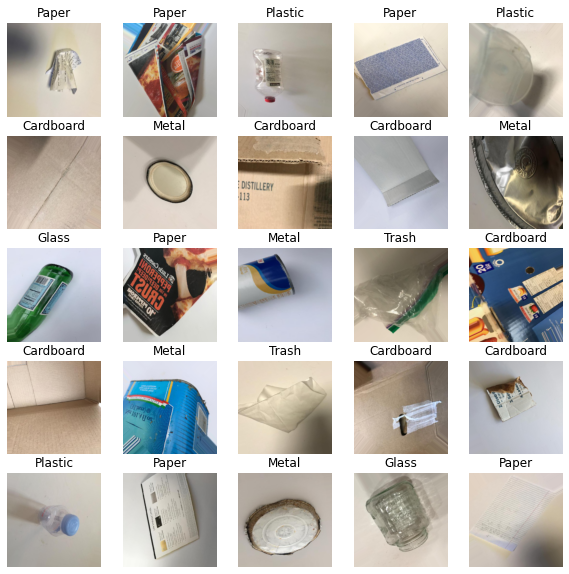

In [18]:
image_batch, label_batch = generated_train_data[0]
show_image(image_batch, label_batch)

In [19]:
image_batch[0].shape

(250, 250, 3)

# Model Import

가장 기본적인 LeNet-5 을 조금 변형

In [52]:
DROPOUT_RATE = 0.1

In [53]:
model_input_layer = K.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
cnn_1 = K.layers.Conv2D(filters=6, kernel_size=(6,6), activation="relu")(model_input_layer)
pool_1 = K.layers.MaxPool2D()(cnn_1)
drop_1 = K.layers.Dropout(DROPOUT_RATE)(pool_1)
cnn_2 = K.layers.Conv2D(filters=6, kernel_size = (28,28), activation="relu")(drop_1)
pool_2 = K.layers.MaxPool2D()(cnn_2)
drop_2 = K.layers.Dropout(DROPOUT_RATE)(pool_2)

flatten = K.layers.Flatten()(drop_2)

dense_1 = K.layers.Dense(5000, activation='relu')(flatten)
drop_3 = K.layers.Dropout(DROPOUT_RATE)(dense_1)
dense_2 = K.layers.Dense(100, activation='relu')(drop_3)
model_output_layer = K.layers.Dense(len(CLASSES), activation="softmax")(dense_2)

model = K.Model(inputs=model_input_layer, outputs=model_output_layer)



In [54]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 245, 245, 6)       654       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 122, 122, 6)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 122, 122, 6)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 95, 95, 6)         28230     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 47, 47, 6)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 47, 47, 6)        

In [55]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

In [56]:
EPOCHS = 50

In [57]:
model.fit(generated_train_data, epochs=EPOCHS)

Epoch 1/50
20/20 [==============================] - 37s 2s/step - loss: 128.3688 - accuracy: 0.2224
Epoch 2/50
20/20 [==============================] - 37s 2s/step - loss: 1.7588 - accuracy: 0.2351
Epoch 3/50
20/20 [==============================] - 36s 2s/step - loss: 1.7354 - accuracy: 0.2351
Epoch 4/50
20/20 [==============================] - 36s 2s/step - loss: 1.7266 - accuracy: 0.2351
Epoch 5/50
20/20 [==============================] - 36s 2s/step - loss: 1.7249 - accuracy: 0.2351
Epoch 6/50
 6/20 [========>.....................] - ETA: 22s - loss: 1.7133 - accuracy: 0.2331

KeyboardInterrupt: ignored

In [37]:
np_classes

array(['glass', 'paper', 'metal', 'cardboard', 'plastic', 'trash'],
      dtype='<U9')

In [58]:
def show_predict_image(image_batch, label_batch):
  plt.figure(figsize = (10,10))
  for n in range(25):
    ax = plt.subplot(5, 5, n+1)
    plt.imshow(image_batch[n])
    prediction = model.predict(image_batch[n:n+1]).argmax()
    # if prediction != 5:
    #   plt.title("Recycle\n" + np_classes[label_batch[n] == 1][0].title())
    # else:
    #   plt.title("Non-Recycle\n" + np_classes[label_batch[n] == 1][0].title())
    plt.title(np_classes[prediction])
    plt.axis('off')

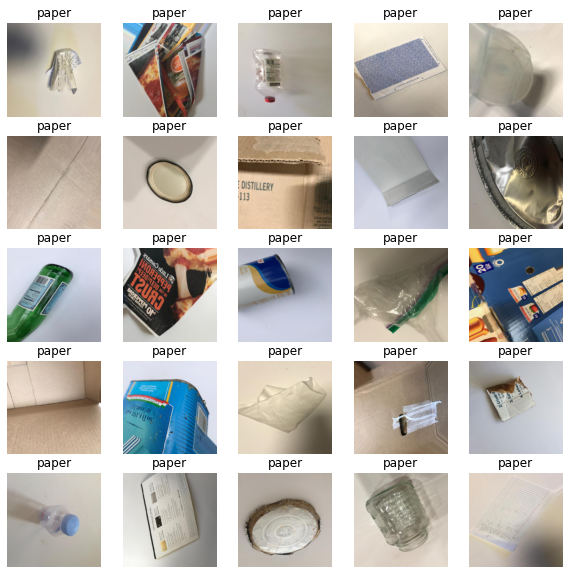

In [59]:
show_predict_image(image_batch, label_batch)